<a href="https://colab.research.google.com/github/Subhranshu-123/BIKE2/blob/main/internai_1_(qsn1)_subhranshu_sekhar_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import statsmodels.api as sm

In [8]:
mat = pd.read_csv("student-mat.csv", sep=';')
por = pd.read_csv("student-por.csv", sep=';')

In [9]:
mat

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0    ...      4        3      4     1     1      3        6   5   6   6  
1    ...      5        3      3     1     1      3        4   5   5   6  
2    ...      4        3      2     2     3      3       10   7   8  10  
3    ...      3        2      2     1     1      5        2  15  14  15  
4    ...      4        3      2     1     2      5        4   6  10  10  
..   ...    ...      ...    ...   ...   ...    ...      ...  ..  ..  ..  
390  ...      5        5      4     4     5      4       11   9   9   9  
391  ...      2        4      5     3     4      2        3  14  16  16  
392  ...      5        5      3     3     3      3        3  10   8   7  
393  ...      4        4      1     3     4      5        0  11  12  10  
394  ...      3        2      3     3     3      5        5   8   9   9  

[395 rows x 33 columns]

In [10]:
por

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0    ...      4        3      4     1     1      3        4   0  11  11  
1    ...      5        3      3     1     1      3        2   9  11  11  
2    ...      4        3      2     2     3      3        6  12  13  12  
3    ...      3        2      2     1     1      5        0  14  14  14  
4    ...      4        3      2     1     2      5        0  11  13  13  
..   ...    ...      ...    ...   ...   ...    ...      ...  ..  ..  ..  
644  ...      5        4      2     1     2      5        4  10  11  10  
645  ...      4        3      4     1     1      1        4  15  15  16  
646  ...      1        1      1     1     1      5        6  11  12   9  
647  ...      2        4      5     3     4      2        6  10  10  10  
648  ...      4        4      1     3     4      5        4  10  11  11  

[649 rows x 33 columns]

In [4]:
df = pd.concat([mat,por])

In [5]:
df.columns = ['school','sex','age','address','family_size','parents_status','mother_education','father_education',
           'mother_job','father_job','reason','guardian','commute_time','study_time','failures','school_support',
          'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic','family_quality',
          'free_time','go_out','weekday_alcohol_usage','weekend_alcohol_usage','health','absences','period1_score','period2_score','final_score']

In [6]:
df['final_grade'] = 'na'
df.loc[(df.final_score >= 15) & (df.final_score <= 20), 'final_grade'] = 'good'
df.loc[(df.final_score >= 10) & (df.final_score <= 14), 'final_grade'] = 'fair'
df.loc[(df.final_score >= 0) & (df.final_score <= 9), 'final_grade'] = 'poor'
df.head(5)

school sex  age address family_size parents_status  mother_education  \
0     GP   F   18       U         GT3              A                 4   
1     GP   F   17       U         GT3              T                 1   
2     GP   F   15       U         LE3              T                 1   
3     GP   F   15       U         GT3              T                 4   
4     GP   F   16       U         GT3              T                 3   

   father_education mother_job father_job  ... free_time go_out  \
0                 4    at_home    teacher  ...         3      4   
1                 1    at_home      other  ...         3      3   
2                 1    at_home      other  ...         3      2   
3                 2     health   services  ...         2      2   
4                 3      other      other  ...         3      2   

   weekday_alcohol_usage  weekend_alcohol_usage  health absences  \
0                      1                      1       3        6   
1                      1                      1       3        4   
2                      2                      3       3       10   
3                      1                      1       5        2   
4                      1                      2       5        4   

  period1_score period2_score final_score final_grade  
0             5             6           6        poor  
1             5             5           6        poor  
2             7             8          10        fair  
3            15            14          15        good  
4             6            10          10        fair  

[5 rows x 34 columns]

In [11]:
#missin g values(no misssing values)
df.isnull().any()

school                   False
sex                      False
age                      False
address                  False
family_size              False
parents_status           False
mother_education         False
father_education         False
mother_job               False
father_job               False
reason                   False
guardian                 False
commute_time             False
study_time               False
failures                 False
school_support           False
family_support           False
paid_classes             False
activities               False
nursery                  False
desire_higher_edu        False
internet                 False
romantic                 False
family_quality           False
free_time                False
go_out                   False
weekday_alcohol_usage    False
weekend_alcohol_usage    False
health                   False
absences                 False
period1_score            False
period2_score            False
final_score              False
final_grade              False
dtype: bool

/tmp/ipython-input-12-3517709638.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df.final_grade, order=["poor","fair","good"], palette='Set1')


Text(0, 0.5, 'Number of Student')

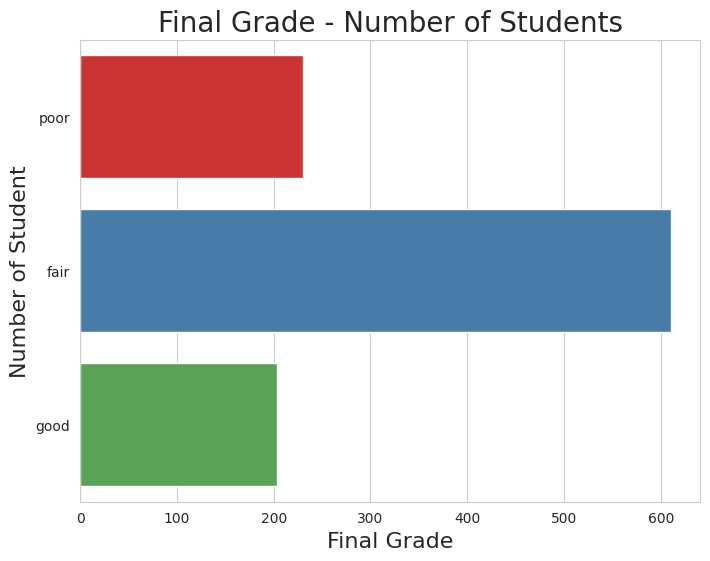

In [12]:
plt.figure(figsize=(8,6))
sns.countplot(df.final_grade, order=["poor","fair","good"], palette='Set1')
plt.title('Final Grade - Number of Students',fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Number of Student', fontsize=16)

Text(0.5, 1.0, 'Correlation Heatmap')

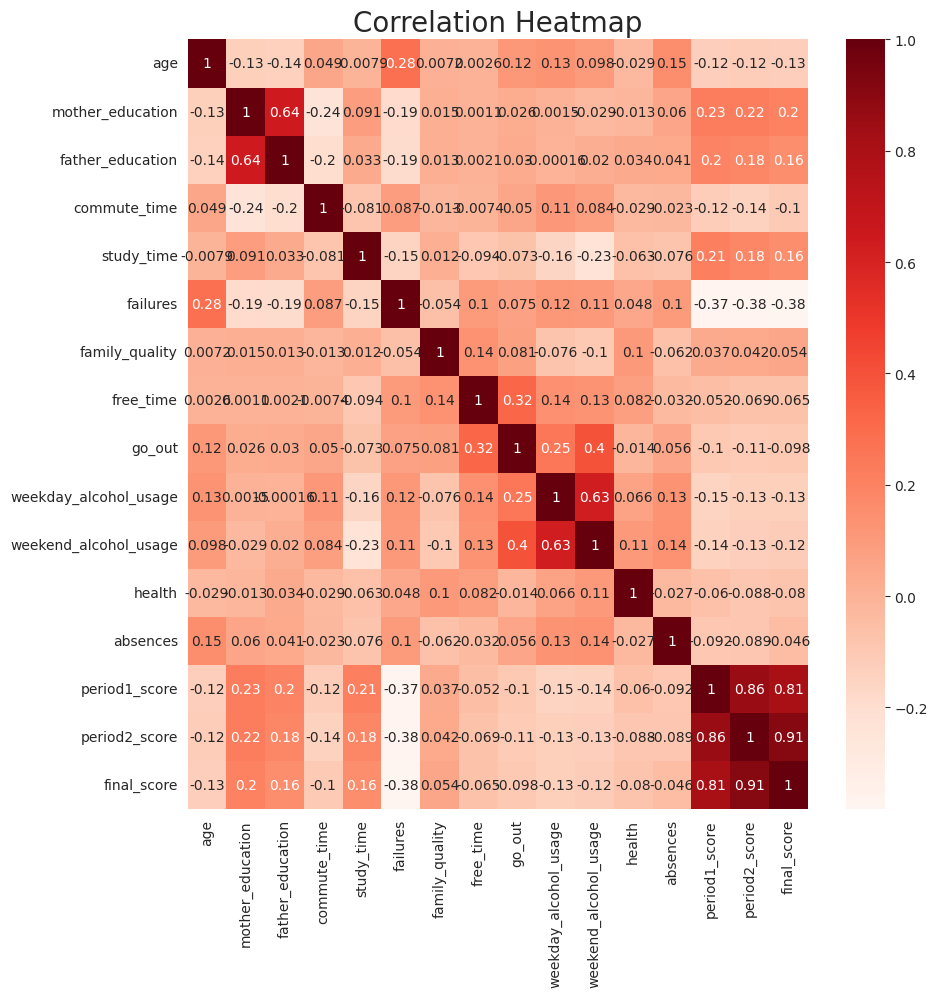

In [14]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)

corr = numeric_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

In [17]:
perc = (lambda col: col/col.sum())
index = ['poor','fair','good']
failure_tab1 = pd.crosstab(index=df.final_grade, columns=df.failures)
failure_tab = np.log(failure_tab1)
failure_perc = failure_tab.apply(perc).reindex(index)

/usr/local/lib/python3.11/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


<Figure size 640x480 with 0 Axes>

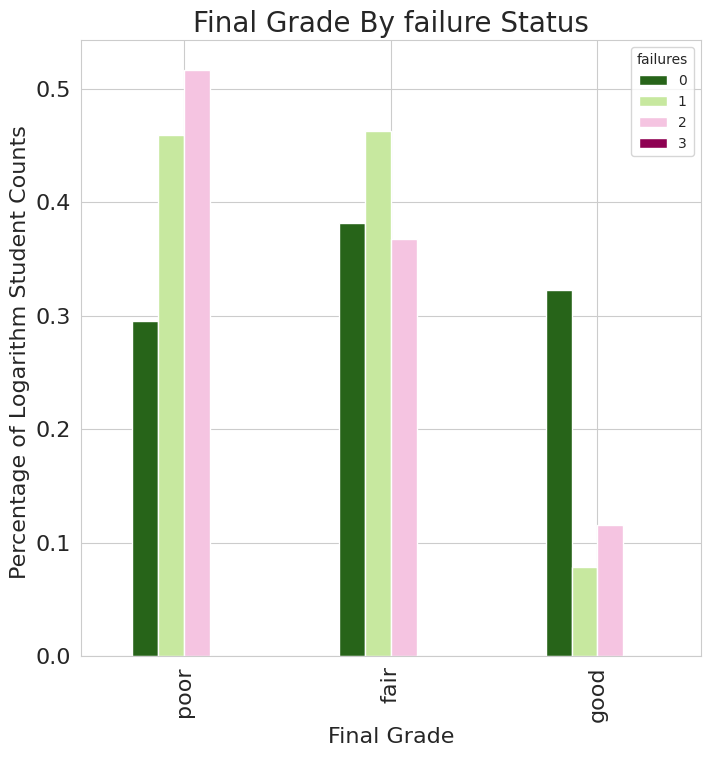

In [18]:
plt.figure()
failure_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title('Final Grade By failure Status', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

In [19]:
perc = (lambda col: col/col.sum())
index = ['poor','fair','good']
absences_tab1 = pd.crosstab(index=df.final_grade, columns=df.absences)
absences_tab = np.log(failure_tab1)
absences_perc = absences_tab.apply(perc).reindex(index)

/usr/local/lib/python3.11/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


<Figure size 640x480 with 0 Axes>

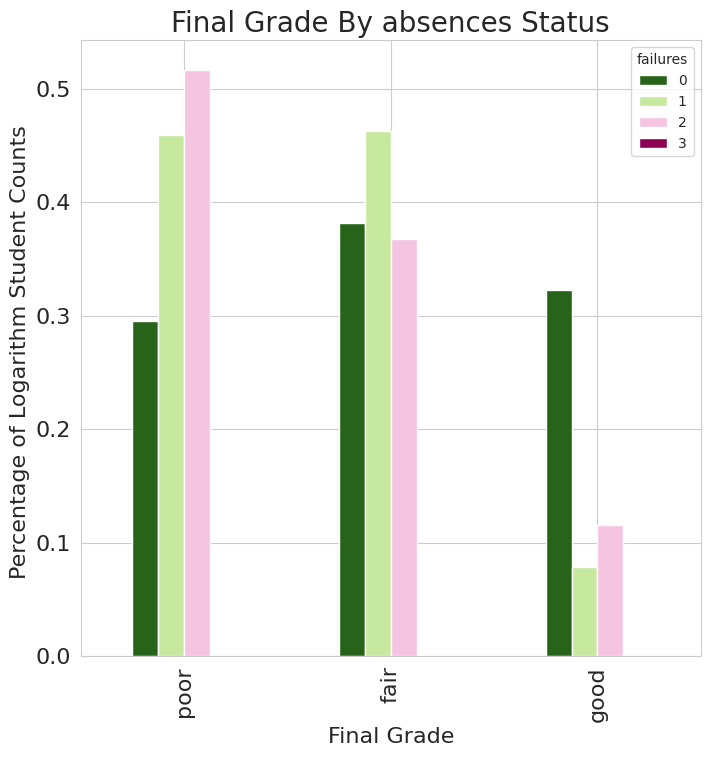

In [20]:
plt.figure()
failure_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title('Final Grade By absences Status', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

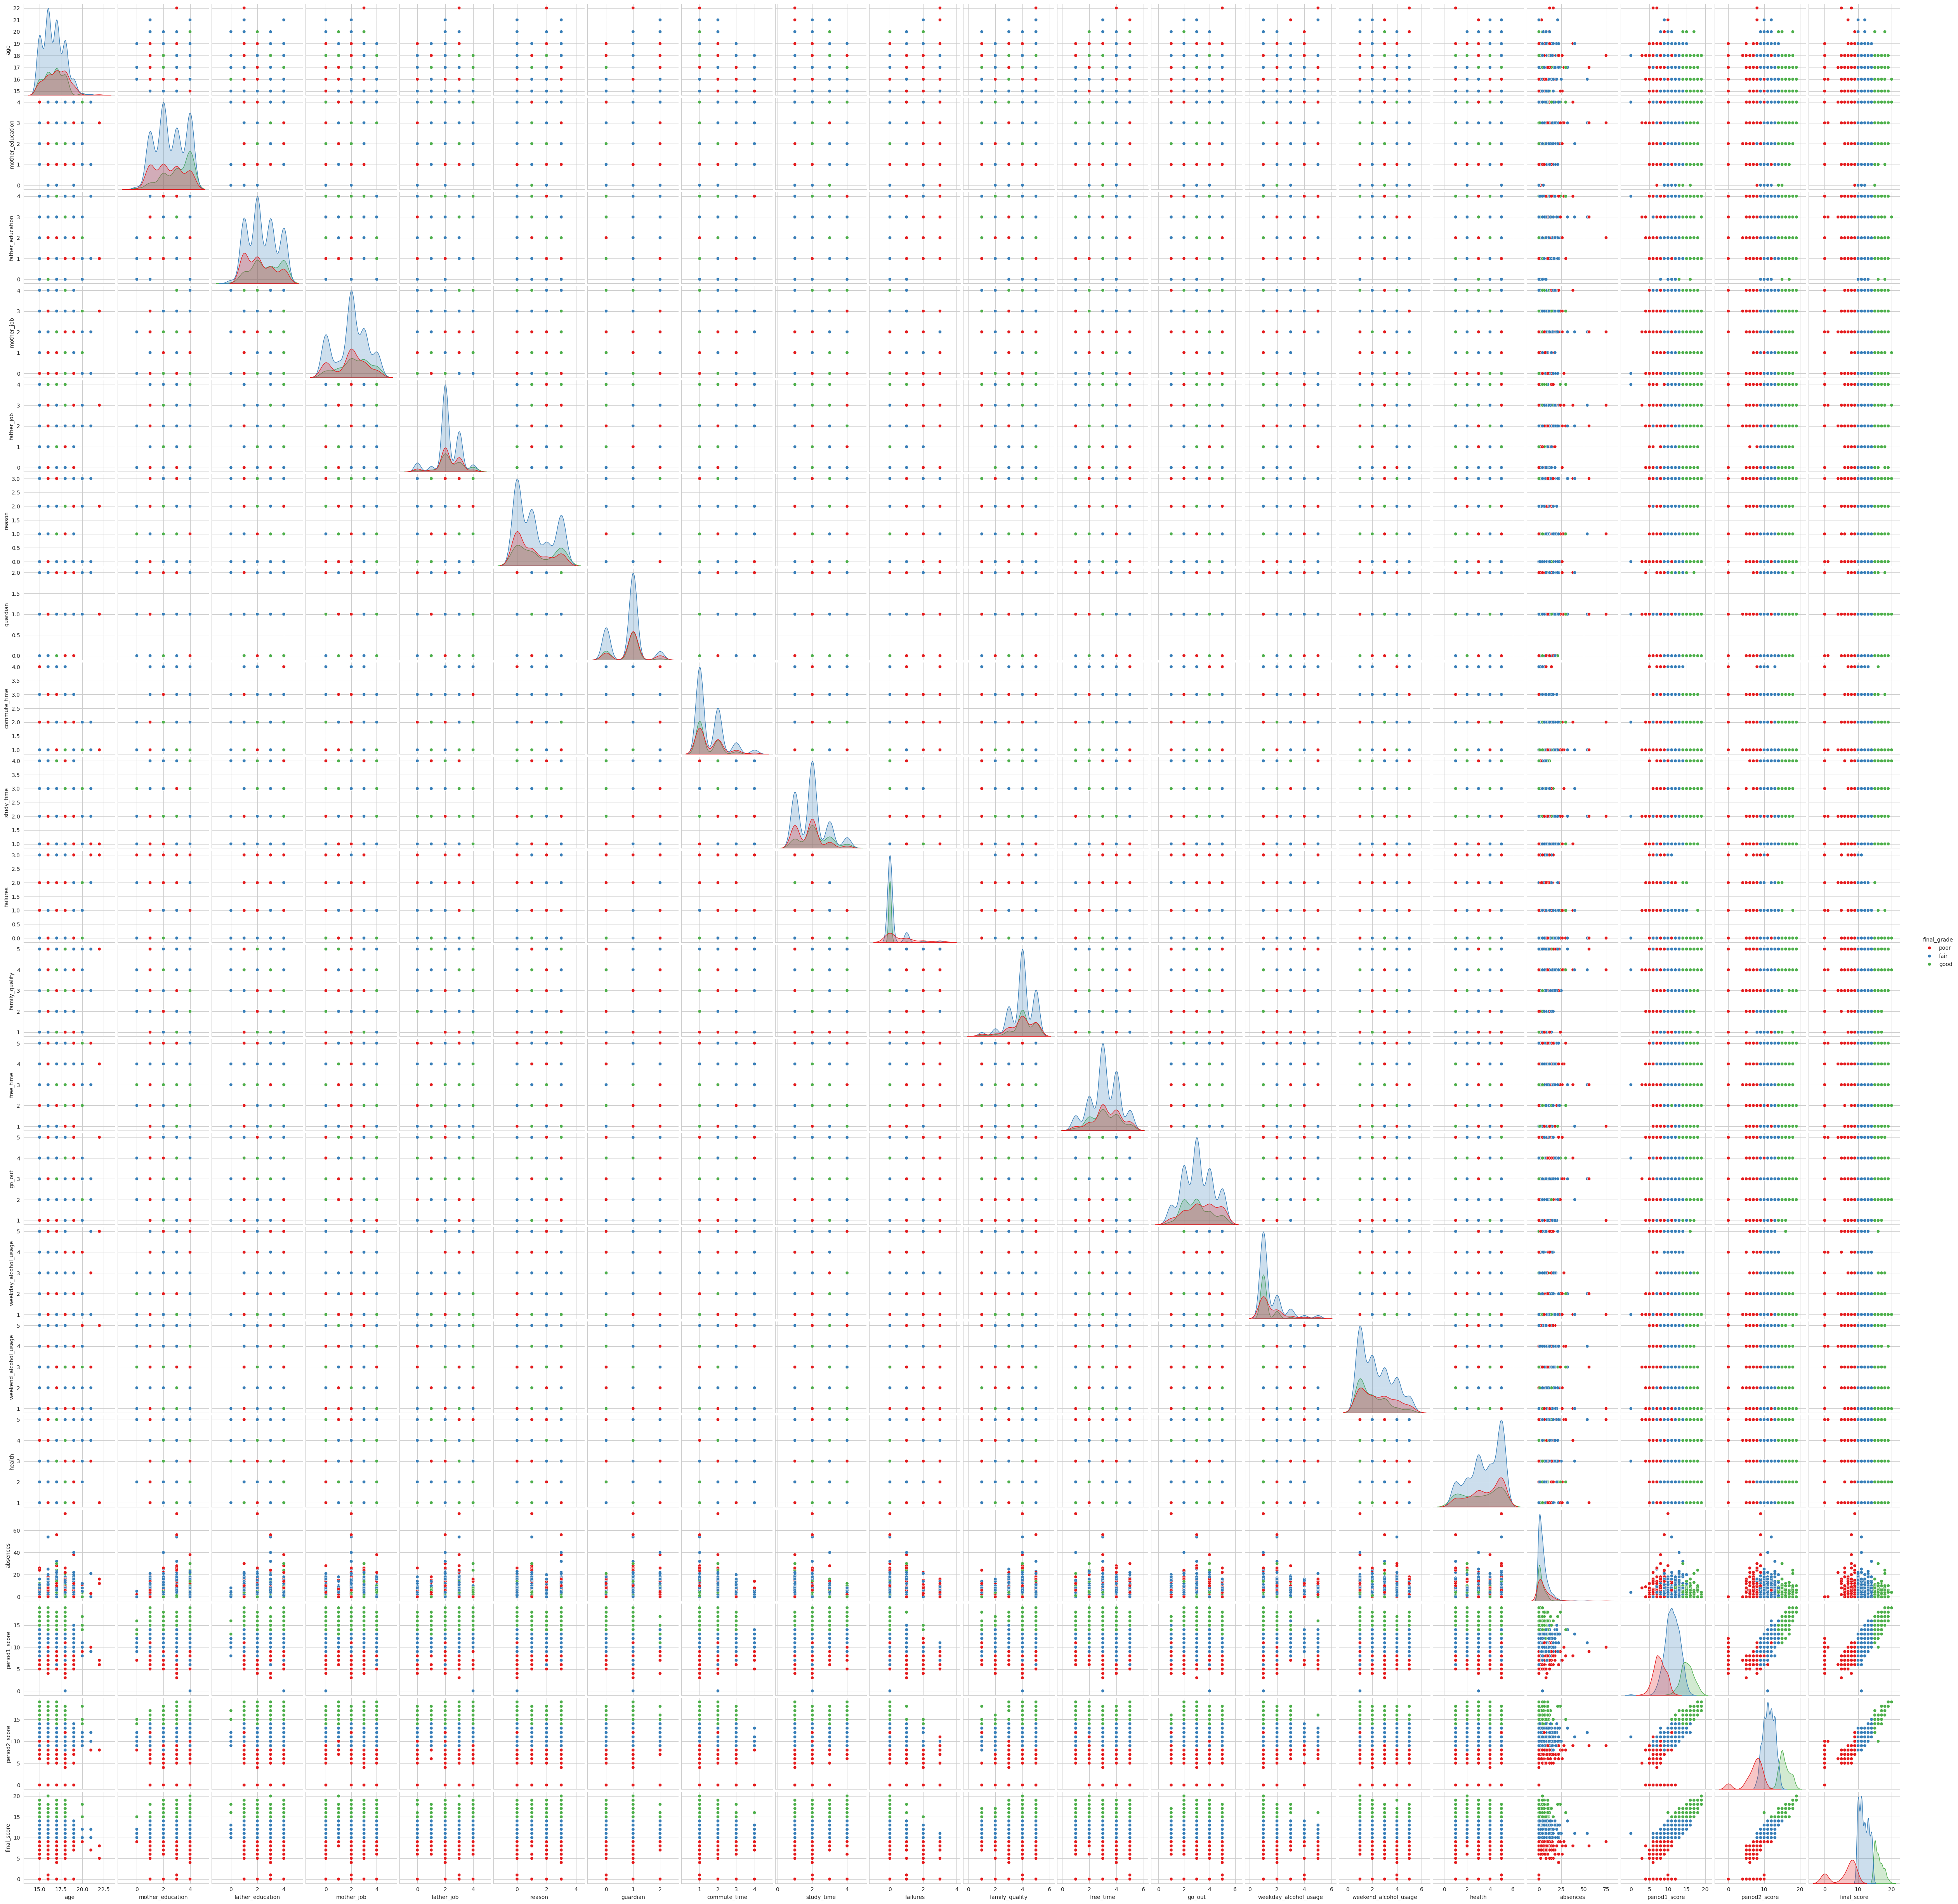

In [39]:
sns.pairplot(df, hue='final_grade', palette='Set1')
plt.show()

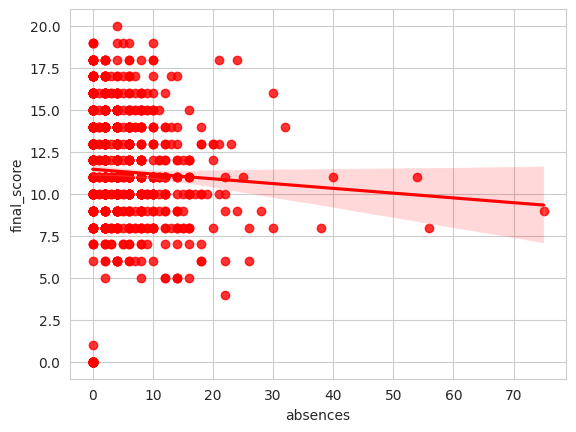

In [41]:
sns.regplot(x='absences', y='final_score', data=df, color='red')
plt.show()

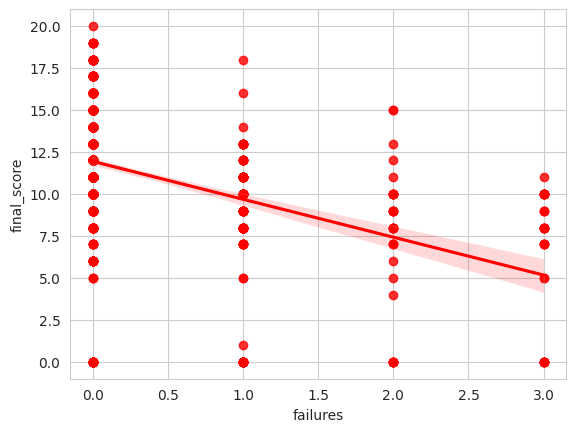

In [42]:
sns.regplot(x='failures', y='final_score', data=df, color='red')
plt.show()

In [21]:
dfd = df.copy()
dfd = dfd.drop([ 'final_score'], axis=1)

In [22]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dfd.final_grade = le.fit_transform(dfd.final_grade)

In [24]:
from sklearn.model_selection import train_test_split
X = dfd.drop('final_grade',axis=1)
y = dfd.final_grade
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [25]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)



In [26]:
len(list(X_train))

58

Text(0.5, 0, 'Age')

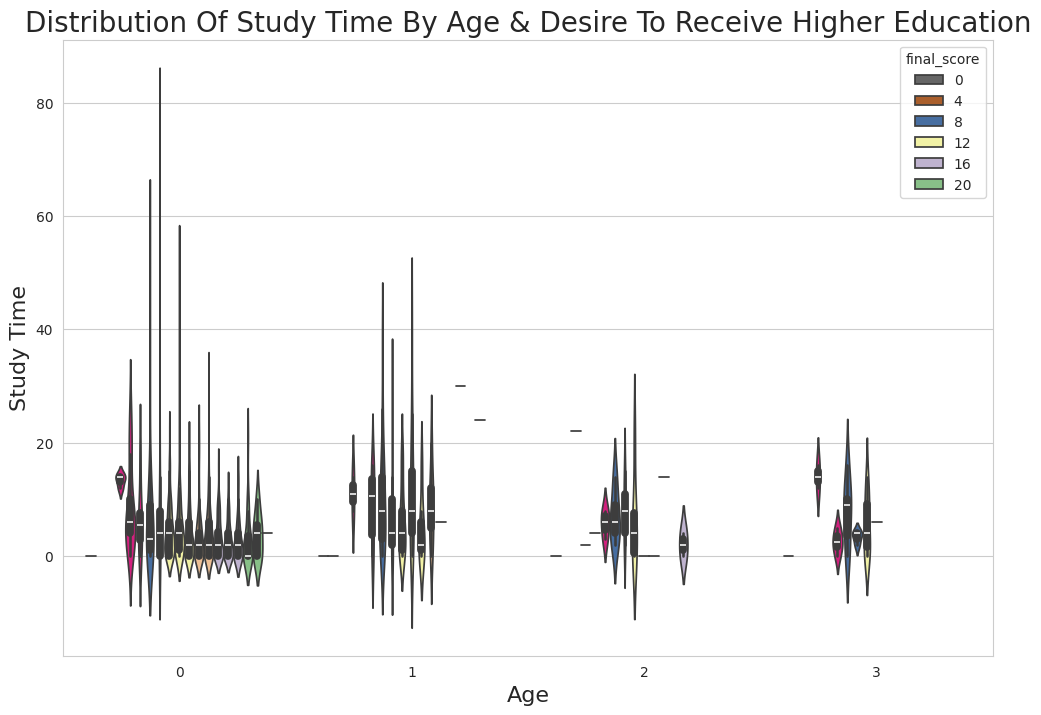

In [47]:
plt.figure(figsize=(12,8))
sns.violinplot(x='failures', y='absences', hue='final_score', data=df, palette="Accent_r")
plt.title('Distribution Of Study Time By Age & Desire To Receive Higher Education', fontsize=20)
plt.ylabel('Study Time', fontsize=16)
plt.xlabel('Age', fontsize=16)

Text(0.5, 0, 'Final Grade')

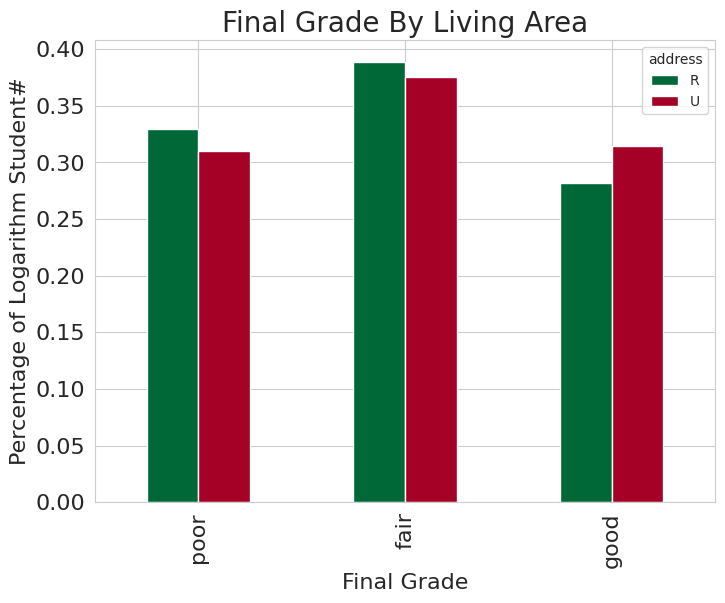

In [28]:
ad_tab1 = pd.crosstab(index=df.final_grade, columns=df.address)
ad_tab = np.log(ad_tab1)
ad_perc = ad_tab.apply(perc).reindex(index)



ad_perc.plot.bar(colormap="RdYlGn_r", fontsize=16, figsize=(8,6))
plt.title('Final Grade By Living Area', fontsize=20)
plt.ylabel('Percentage of Logarithm Student#', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

Text(0.5, 0, 'Final Grade')

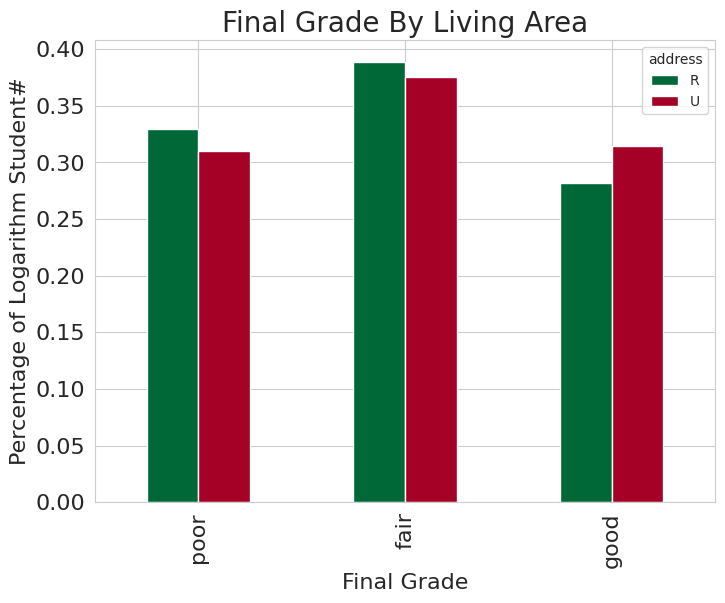

In [30]:
ad_tab1 = pd.crosstab(index=df.final_grade, columns=df.address)
ad_tab = np.log(ad_tab1)
ad_perc = ad_tab.apply(perc).reindex(index)
ad_perc.plot.bar(colormap="RdYlGn_r", fontsize=16, figsize=(8,6))
plt.title('Final Grade By Living Area', fontsize=20)
plt.ylabel('Percentage of Logarithm Student#', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

In [33]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['mother_job'] = le.fit_transform(df['mother_job'])
df['father_job'] = le.fit_transform(df['father_job'])
df['reason'] = le.fit_transform(df['reason'])
df['guardian'] = le.fit_transform(df['guardian'])
df.head()

school sex  age address family_size parents_status  mother_education  \
0     GP   F   18       U         GT3              A                 4   
1     GP   F   17       U         GT3              T                 1   
2     GP   F   15       U         LE3              T                 1   
3     GP   F   15       U         GT3              T                 4   
4     GP   F   16       U         GT3              T                 3   

   father_education  mother_job  father_job  ...  free_time  go_out  \
0                 4           0           4  ...          3       4   
1                 1           0           2  ...          3       3   
2                 1           0           2  ...          3       2   
3                 2           1           3  ...          2       2   
4                 3           2           2  ...          3       2   

   weekday_alcohol_usage  weekend_alcohol_usage  health absences  \
0                      1                      1       3        6   
1                      1                      1       3        4   
2                      2                      3       3       10   
3                      1                      1       5        2   
4                      1                      2       5        4   

  period1_score period2_score final_score final_grade  
0             5             6           6        poor  
1             5             5           6        poor  
2             7             8          10        fair  
3            15            14          15        good  
4             6            10          10        fair  

[5 rows x 34 columns]

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Apply one-hot encoding to categorical columns in X
X = pd.get_dummies(X)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.7010321472426494
R-squared: 0.06004711081999603


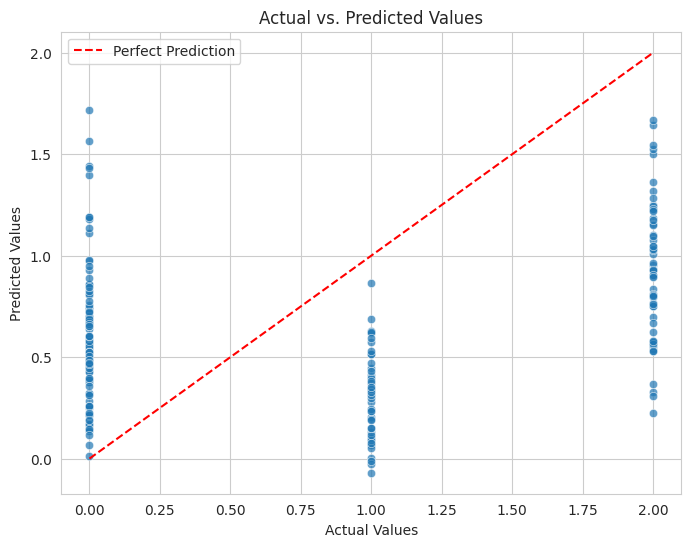

In [44]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test.values, y=y_pred, alpha=0.7) # Use .values to get NumPy arrays
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

In [50]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import numpy as np

# Round the continuous predictions and convert to integers, ensuring they are within the valid range of labels
y_pred_discrete = np.round(y_pred).astype(int)
y_pred_discrete = np.clip(y_pred_discrete, 0, 2) # Assuming labels are 0, 1, 2

cm=confusion_matrix(y_test,y_pred_discrete)

In [51]:
print("confusion Matrix :\n",cm)

confusion Matrix :
 [[42 62  2]
 [33 10  0]
 [ 4 51  5]]


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np # Import numpy for sqrt

# Apply one-hot encoding to categorical columns in X
X = pd.get_dummies(X)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Calculate RMSE from MSE
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Root Mean Squared Error: 0.8372766252814235
R-squared: 0.06004711081999603
